In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import csv

In [3]:
train_df = pd.read_csv('Training Data.csv')

In [4]:
train_df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [5]:
min_value = train_df['Income'].min()
max_value = train_df['Income'].max()
min_value,max_value

(10310, 9999938)

In [6]:
min_value = train_df['Experience'].min()
max_value = train_df['Experience'].max()
min_value,max_value

(0, 20)

Block: red, 'x' count: 436, 'o' count: 110
Block: blue, 'x' count: 891, 'o' count: 125
Block: green, 'x' count: 611, 'o' count: 146
Block: orange, 'x' count: 6267, 'o' count: 1165
Block: purple, 'x' count: 6253, 'o' count: 870
Block: yellow, 'x' count: 6613, 'o' count: 968
Block: cyan, 'x' count: 65046, 'o' count: 10156


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Block: magenta, 'x' count: 66917, 'o' count: 8927
Block: brown, 'x' count: 67970, 'o' count: 8529


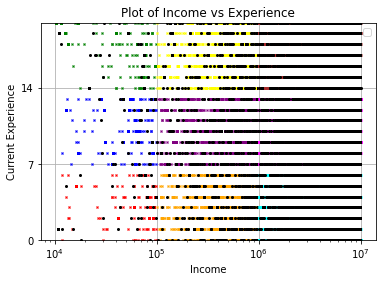

<Figure size 1440x864 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

# Assuming train_df['Income'], train_df['CURRENT_JOB_YRS'], and train_df['RISK_FLAG'] are your columns
income_data = train_df['Income']
experience_data = train_df['Experience']
risk_flag_data = train_df['Risk_Flag']

# Define the segments based on the conditions you provided
segments = [
    (income_data < 1e5) & (experience_data < 7),
    (income_data < 1e5) & (experience_data >= 7) & (experience_data < 14),
    (income_data < 1e5) & (experience_data >= 14) ,
    (income_data >= 1e5) & (income_data < 1e6) & (experience_data < 7),
    (income_data >= 1e5) & (income_data < 1e6) & (experience_data >= 7) & (experience_data < 14),
    (income_data >= 1e5) & (income_data < 1e6) & (experience_data >= 14),
    (income_data >= 1e6) & (income_data < 1e7) & (experience_data < 7),
    (income_data >= 1e6) & (income_data < 1e7) & (experience_data >= 7) & (experience_data < 14),
    (income_data >= 1e6) & (income_data < 1e7) & (experience_data >= 14)
]

# Define colors for each segment
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown']

# Define markers for each RISK_FLAG category
markers = ['x', 'o']  # Replaced 'tick' with 'o'

# Plot each segment with a different color and marker based on RISK_FLAG
for seg, color in zip(segments, colors):
    for flag, marker in zip(range(2), markers):  # Iterate over RISK_FLAG categories (0 and 1)
        data = seg & (risk_flag_data == flag)
        if data.any():
            if marker == 'o':  # Change the color for 'o' marker
                plt.plot(income_data[data], experience_data[data], marker=marker, markersize=2, linestyle='', color='black')
            else:
                plt.plot(income_data[data], experience_data[data], marker=marker, markersize=2, linestyle='', color=color)
    
    # Print the number of 'x' and 'o' markers in the current block
    num_x = sum((risk_flag_data[seg] == 0) & (income_data[seg] >= 0) & (experience_data[seg] >= 0))
    num_o = sum((risk_flag_data[seg] == 1) & (income_data[seg] >= 0) & (experience_data[seg] >= 0))
    print(f"Block: {color}, 'x' count: {num_x}, 'o' count: {num_o}")

plt.xlabel('Income')
plt.ylabel('Current Experience')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yticks([0, 7, 14], ['0', '7', '14'])  # Set custom ticks and labels for y-axis
plt.ylim(0, 20)     # Set y-axis range from 0 to 14
plt.grid(True)     # Show grid
plt.title('Plot of Income vs Experience')
plt.legend()
plt.figure(figsize=(20,12))
plt.show()

In [8]:
import pandas as pd

# Initialize a new DataFrame to store the modified data
new_train_df = train_df.copy()# Assuming train_df['Income'], train_df['CURRENT_JOB_YRS'], and train_df['RISK_FLAG'] are your columns
income_data = new_train_df['Income']
experience_data = new_train_df['Experience']
risk_flag_data = new_train_df['Risk_Flag']

# Define the segments based on the conditions you provided
segments = [
    (income_data < 1e5) & (experience_data < 7),
    (income_data < 1e5) & (experience_data >= 7) & (experience_data < 14),
    (income_data < 1e5) & (experience_data >= 14) ,
    (income_data >= 1e5) & (income_data < 1e6) & (experience_data < 7),
    (income_data >= 1e5) & (income_data < 1e6) & (experience_data >= 7) & (experience_data < 14),
    (income_data >= 1e5) & (income_data < 1e6) & (experience_data >= 14),
    (income_data >= 1e6) & (income_data < 1e7) & (experience_data < 7),
    (income_data >= 1e6) & (income_data < 1e7) & (experience_data >= 7) & (experience_data < 14),
    (income_data >= 1e6) & (income_data < 1e7) & (experience_data >= 14)
]

# Define ratios for 'x' to 'o' markers in each region
ratios = [
    (20, 110),  # red
    (45, 125),  # blue
    (95, 146),  # green
    (400, 1165),  # orange
    (600, 870),  # purple
    (2000, 968),  # yellow
    (6000, 10156),  # cyan
    (20000, 8927),  # magenta
    (40000, 8529)   # brown
]

# Iterate over segments and adjust counts of 'x' and 'o' markers according to ratios
for seg, ratio in zip(segments, ratios):
    num_x, num_o = ratio
    mask_x = (risk_flag_data == 0) & seg
    mask_o = (risk_flag_data == 1) & seg
    indices_x = mask_x[mask_x].sample(n=num_x, replace=True).index
    indices_o = mask_o[mask_o].sample(n=num_o, replace=True).index
    new_train_df.loc[indices_x, 'RISK_FLAG'] = 0
    new_train_df.loc[indices_o, 'RISK_FLAG'] = 1

# Verify the counts of 'x' and 'o' markers in each region
for i, seg in enumerate(segments):
    print(f"Region {i}:")
    print("Count of 'x':", sum((new_train_df['RISK_FLAG'] == 0) & seg))
    print("Count of 'o':", sum((new_train_df['RISK_FLAG'] == 1) & seg))# Assuming train_df['Income'], train_df['CURRENT_JOB_YRS'], and train_df['RISK_FLAG'] are your columns

# Now, new_train_df contains the modified data with the specified ratios of 'x' to 'o' markers in different regions
new_train_df = new_train_df.dropna(subset=['RISK_FLAG'])
new_train_df = new_train_df.drop(columns=['Risk_Flag'])
new_train_df = new_train_df.rename(columns={'RISK_FLAG': 'Risk_Flag'})
new_train_df['Risk_Flag'] = new_train_df['Risk_Flag'].astype(int)

Region 0:
Count of 'x': 18
Count of 'o': 72
Region 1:
Count of 'x': 43
Count of 'o': 75
Region 2:
Count of 'x': 85
Count of 'o': 93
Region 3:
Count of 'x': 389
Count of 'o': 720
Region 4:
Count of 'x': 565
Count of 'o': 551
Region 5:
Count of 'x': 1713
Count of 'o': 621
Region 6:
Count of 'x': 5728
Count of 'o': 6463
Region 7:
Count of 'x': 17365
Count of 'o': 5623
Region 8:
Count of 'x': 30213
Count of 'o': 5376


In [9]:
new_train_df['Risk_Flag']

1         0
2         0
3         1
8         0
14        1
         ..
251978    0
251981    1
251982    1
251993    1
251995    0
Name: Risk_Flag, Length: 75713, dtype: int32

Block: red, 'x' count: 20, 'o' count: 69
Block: blue, 'x' count: 45, 'o' count: 79
Block: green, 'x' count: 86, 'o' count: 93
Block: orange, 'x' count: 390, 'o' count: 742
Block: purple, 'x' count: 569, 'o' count: 550
Block: yellow, 'x' count: 1725, 'o' count: 612
Block: cyan, 'x' count: 5724, 'o' count: 6427


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Block: magenta, 'x' count: 17283, 'o' count: 5656
Block: brown, 'x' count: 30229, 'o' count: 5368


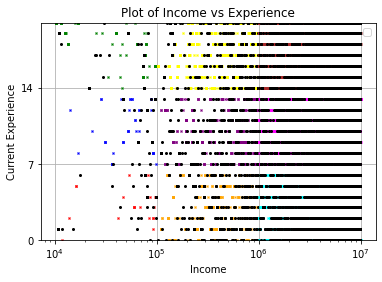

<Figure size 1440x864 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

# Assuming train_df['Income'], train_df['CURRENT_JOB_YRS'], and train_df['RISK_FLAG'] are your columns
income_data = new_train_df['Income']
experience_data = new_train_df['Experience']
risk_flag_data = new_train_df['Risk_Flag']

# Define the segments based on the conditions you provided
segments = [
    (income_data < 1e5) & (experience_data < 7),
    (income_data < 1e5) & (experience_data >= 7) & (experience_data < 14),
    (income_data < 1e5) & (experience_data >= 14) ,
    (income_data >= 1e5) & (income_data < 1e6) & (experience_data < 7),
    (income_data >= 1e5) & (income_data < 1e6) & (experience_data >= 7) & (experience_data < 14),
    (income_data >= 1e5) & (income_data < 1e6) & (experience_data >= 14),
    (income_data >= 1e6) & (income_data < 1e7) & (experience_data < 7),
    (income_data >= 1e6) & (income_data < 1e7) & (experience_data >= 7) & (experience_data < 14),
    (income_data >= 1e6) & (income_data < 1e7) & (experience_data >= 14)
]

# Define colors for each segment
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown']

# Define markers for each RISK_FLAG category
markers = ['x', 'o']  # Replaced 'tick' with 'o'

# Plot each segment with a different color and marker based on RISK_FLAG
for seg, color in zip(segments, colors):
    for flag, marker in zip(range(2), markers):  # Iterate over RISK_FLAG categories (0 and 1)
        data = seg & (risk_flag_data == flag)
        if data.any():
            if marker == 'o':  # Change the color for 'o' marker
                plt.plot(income_data[data], experience_data[data], marker=marker, markersize=2, linestyle='', color='black')
            else:
                plt.plot(income_data[data], experience_data[data], marker=marker, markersize=2, linestyle='', color=color)
    
    # Print the number of 'x' and 'o' markers in the current block
    num_x = sum((risk_flag_data[seg] == 0) & (income_data[seg] >= 0) & (experience_data[seg] >= 0))
    num_o = sum((risk_flag_data[seg] == 1) & (income_data[seg] >= 0) & (experience_data[seg] >= 0))
    print(f"Block: {color}, 'x' count: {num_x}, 'o' count: {num_o}")

plt.xlabel('Income')
plt.ylabel('Current Experience')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yticks([0, 7, 14], ['0', '7', '14'])  # Set custom ticks and labels for y-axis
plt.ylim(0, 20)     # Set y-axis range from 0 to 14
plt.grid(True)     # Show grid
plt.title('Plot of Income vs Experience')
plt.legend()
plt.figure(figsize=(20,12))
plt.show()

In [10]:
new_train_df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
14,15,9420838,48,6,single,rented,no,Technical_writer,Madurai,Tamil_Nadu,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251978,251979,4828696,58,19,single,rented,yes,Police_officer,Nandyal,Andhra_Pradesh,12,14,0
251981,251982,1796713,47,2,single,rented,no,Technician,Kolhapur,Maharashtra,2,12,1
251982,251983,3182290,52,2,single,rented,no,Drafter,Naihati,West_Bengal,2,10,1
251993,251994,8141027,60,10,single,rented,no,Secretary,Bhusawal,Maharashtra,9,13,1


In [11]:
new_train_df.to_csv('income_experience_dataset.csv', index=False)

In [13]:
in_data =pd.read_csv('Combined_Data.csv')
in_data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,279996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10,0
279996,279997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14,1
279997,279998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13,0
279998,279999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14,0


In [14]:
import pandas as pd

# Assuming you have the input data in a DataFrame named `in_data`

# Define income buckets and corresponding desired risk flag ratios
income_buckets = [
    (0, 1000000, 2),
    (1000000, 2000000, 3),
    (2000000, 3000000, 6),
    (3000000, 4000000, 10),
    (4000000, 5000000, 20),
    (5000000, 6000000, 30),
    (6000000, 7000000, 40),
    (7000000, 8000000, 50),
    (8000000, 9000000, 55),
    (9000000, 10000000, 60)
]

# Function to filter DataFrame based on income buckets and adjust risk flag ratios
def filter_data(df):
    filtered_rows = []
    
    for start, end, target_ratio in income_buckets:
        # Filter rows within the current income bucket
        subset = df[(df['Income'] >= start) & (df['Income'] < end)]
        
        # Calculate current count of risk=0 and risk=1
        count_0 = (subset['Risk_Flag'] == 0).sum()
        count_1 = (subset['Risk_Flag'] == 1).sum()
        
        # Calculate desired counts based on the target ratio
        total_count = count_0 + count_1
        desired_count_1 = int(total_count / (target_ratio + 1))
        desired_count_0 = int(total_count - desired_count_1)
        
        if count_0 > desired_count_0:
            # Calculate number of excess risk=0 entries to remove
            to_remove_0 = count_0 - desired_count_0
            # Identify indices of excess risk=0 rows to remove
            indices_to_remove_0 = subset[subset['Risk_Flag'] == 0].index[:to_remove_0]
            # Drop excess risk=0 rows from the subset
            subset = subset.drop(indices_to_remove_0)
        
        elif count_1 > desired_count_1:
            # Calculate number of excess risk=1 entries to remove
            to_remove_1 = count_1 - desired_count_1
            # Identify indices of excess risk=1 rows to remove
            indices_to_remove_1 = subset[subset['Risk_Flag'] == 1].index[:to_remove_1]
            # Drop excess risk=1 rows from the subset
            subset = subset.drop(indices_to_remove_1)
        
        # Append filtered subset to the list
        filtered_rows.append(subset)
    
    # Concatenate all filtered subsets back into a single DataFrame
    filtered_df = pd.concat(filtered_rows)
    
    return filtered_df

# Apply filtering to the input DataFrame
filtered_data = filter_data(in_data)

# Display the filtered DataFrame
print(filtered_data)


            Id   Income  Age  Experience Married/Single House_Ownership  \
91          92   137594   52          10         single          rented   
128        129    46750   33          13         single          rented   
169        170   624985   47          11         single          rented   
172        173   233888   64           1         single          rented   
191        192   979926   61          14         single          rented   
...        ...      ...  ...         ...            ...             ...   
279981  279982  9867887   79           9         single          rented   
279982  279983  9254833   63          13         single          rented   
279995  279996  9955481   57          13         single          rented   
279998  279999  9474180   51          13         single          rented   
279999  280000  9250350   42           9         single          rented   

       Car_Ownership            Profession         CITY           STATE  \
91               yes    

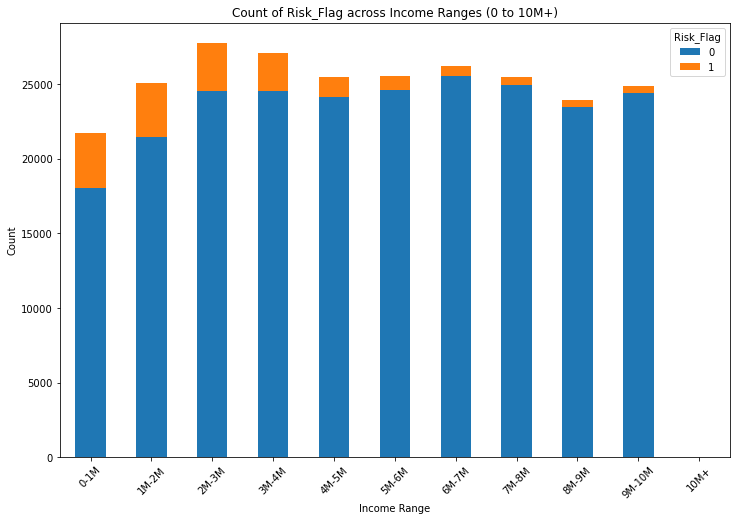


Table showing Risk_Flag counts and ratio (0:1) across Income Ranges:
              Risk_Flag 0 Count  Risk_Flag 1 Count  Ratio (0:1)
Income Range                                                   
0-1M                      18032               3717     4.851224
1M-2M                     21481               3602     5.963631
2M-3M                     24547               3180     7.719182
3M-4M                     24547               2540     9.664173
4M-5M                     24140               1311    18.413425
5M-6M                     24616                905    27.200000
6M-7M                     25504                702    36.330484
7M-8M                     24920                557    44.739677
8M-9M                     23480                481    48.814969
9M-10M                    24377                457    53.341357
10M+                          0                  0          NaN


In [15]:
# Example DataFrame
out_data = filtered_data.copy()
df1 = out_data.copy()

# Define income ranges and labels
income_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
income_labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M+']

# Cut the 'Income' column into income ranges
df1['Income Range'] = pd.cut(df1['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by 'Income Range' and 'Risk_Flag', then count occurrences
grouped_counts = df1.groupby(['Income Range', 'Risk_Flag']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
grouped_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Count of Risk_Flag across Income Ranges (0 to 10M+)')
plt.xticks(rotation=45)
plt.legend(title='Risk_Flag')

# Show plot
plt.show()



# Define income ranges and labels
income_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
income_labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M+']

# Cut the 'Income' column into income ranges
out_data['Income Range'] = pd.cut(out_data['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by 'Income Range' and 'Risk_Flag', then count occurrences
grouped_counts = out_data.groupby(['Income Range', 'Risk_Flag']).size().unstack(fill_value=0)

# Add missing columns to handle all possible Risk_Flag values (0 and 1)
grouped_counts = grouped_counts.reindex(columns=[0, 1], fill_value=0)

# Calculate the ratio of Risk_Flag 0 to 1
grouped_counts['Ratio (0:1)'] = grouped_counts[0] / grouped_counts[1]

# Display the table with counts and ratios
table = grouped_counts[[0, 1, 'Ratio (0:1)']]
table.columns = ['Risk_Flag 0 Count', 'Risk_Flag 1 Count', 'Ratio (0:1)']
print("\nTable showing Risk_Flag counts and ratio (0:1) across Income Ranges:")
print(table)


In [16]:
import pandas as pd
import numpy as np

# Assuming you have the input data in a DataFrame named `in_data`

# Function to balance the ratio of Risk_Flag=0 to Risk_Flag=1 by randomly deleting excess Risk_Flag=0 rows
def balance_risk_flag_ratio(df):
    # Calculate counts of Risk_Flag=0 and Risk_Flag=1
    count_0 = (df['Risk_Flag'] == 0).sum()
    count_1 = (df['Risk_Flag'] == 1).sum()
    
    if count_0 > count_1:
        # Calculate number of excess Risk_Flag=0 rows to remove
        to_remove = count_0 - count_1
        # Get indices of excess Risk_Flag=0 rows
        indices_to_remove = df[df['Risk_Flag'] == 0].sample(n=to_remove, random_state=42).index
        # Drop excess rows from the DataFrame
        df = df.drop(indices_to_remove)
    
    elif count_1 > count_0:
        # Calculate number of excess Risk_Flag=1 rows to remove (though this scenario should not occur in a balanced dataset)
        to_remove = count_1 - count_0
        # Get indices of excess Risk_Flag=1 rows
        indices_to_remove = df[df['Risk_Flag'] == 1].sample(n=to_remove, random_state=42).index
        # Drop excess rows from the DataFrame
        df = df.drop(indices_to_remove)
    
    return df

# Balance the Risk_Flag ratio in the input DataFrame
balanced_data = balance_risk_flag_ratio(filtered_data)

# Display the balanced DataFrame
print(balanced_data)


            Id   Income  Age  Experience Married/Single House_Ownership  \
91          92   137594   52          10         single          rented   
128        129    46750   33          13         single          rented   
169        170   624985   47          11         single          rented   
172        173   233888   64           1         single          rented   
191        192   979926   61          14         single          rented   
...        ...      ...  ...         ...            ...             ...   
279809  279810  9768762   66           1         single          rented   
279820  279821  9569607   51          13         single          rented   
279850  279851  9155705   35          12         single          rented   
279932  279933  9738992   35          17         single          rented   
279973  279974  9122548   58          12         single          rented   

       Car_Ownership          Profession         CITY           STATE  \
91               yes    Te

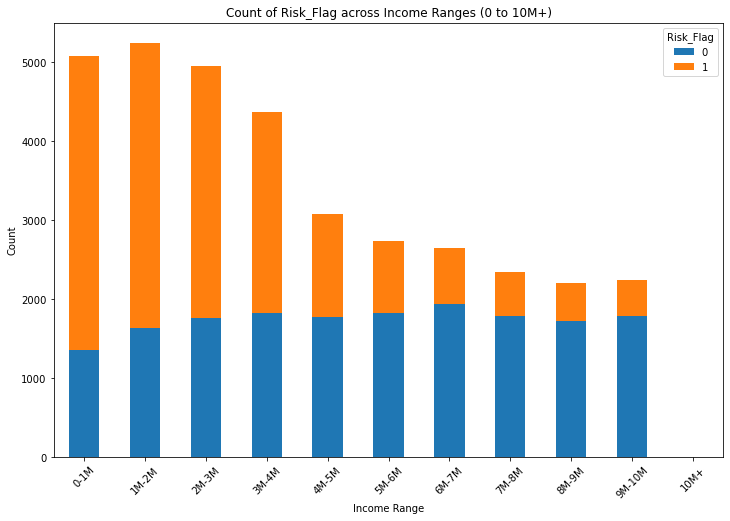


Table showing Risk_Flag counts and ratio (0:1) across Income Ranges:
              Risk_Flag 0 Count  Risk_Flag 1 Count  Ratio (0:1)
Income Range                                                   
0-1M                       1362               3717     0.366425
1M-2M                      1639               3602     0.455025
2M-3M                      1769               3180     0.556289
3M-4M                      1826               2540     0.718898
4M-5M                      1774               1311     1.353166
5M-6M                      1832                905     2.024309
6M-7M                      1943                702     2.767806
7M-8M                      1788                557     3.210054
8M-9M                      1731                481     3.598753
9M-10M                     1788                457     3.912473
10M+                          0                  0          NaN


In [17]:
# Example DataFrame
out_data = balanced_data.copy()
df1 = out_data.copy()

# Define income ranges and labels
income_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
income_labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M+']

# Cut the 'Income' column into income ranges
df1['Income Range'] = pd.cut(df1['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by 'Income Range' and 'Risk_Flag', then count occurrences
grouped_counts = df1.groupby(['Income Range', 'Risk_Flag']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
grouped_counts.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Count of Risk_Flag across Income Ranges (0 to 10M+)')
plt.xticks(rotation=45)
plt.legend(title='Risk_Flag')

# Show plot
plt.show()



# Define income ranges and labels
income_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
income_labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M+']

# Cut the 'Income' column into income ranges
out_data['Income Range'] = pd.cut(out_data['Income'], bins=income_bins, labels=income_labels, right=False)

# Group by 'Income Range' and 'Risk_Flag', then count occurrences
grouped_counts = out_data.groupby(['Income Range', 'Risk_Flag']).size().unstack(fill_value=0)

# Add missing columns to handle all possible Risk_Flag values (0 and 1)
grouped_counts = grouped_counts.reindex(columns=[0, 1], fill_value=0)

# Calculate the ratio of Risk_Flag 0 to 1
grouped_counts['Ratio (0:1)'] = grouped_counts[0] / grouped_counts[1]

# Display the table with counts and ratios
table = grouped_counts[[0, 1, 'Ratio (0:1)']]
table.columns = ['Risk_Flag 0 Count', 'Risk_Flag 1 Count', 'Ratio (0:1)']
print("\nTable showing Risk_Flag counts and ratio (0:1) across Income Ranges:")
print(table)


In [18]:
balanced_data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
91,92,137594,52,10,single,rented,yes,Technical_writer,Sagar,Madhya_Pradesh,7,10,1
128,129,46750,33,13,single,rented,yes,Chef,Morbi,Gujarat,10,11,1
169,170,624985,47,11,single,rented,no,Software_Developer,Varanasi,Uttar_Pradesh,6,11,1
172,173,233888,64,1,single,rented,no,Psychologist,Tumkur,Karnataka,1,10,1
191,192,979926,61,14,single,rented,yes,Police_officer,Indore,Madhya_Pradesh,7,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279809,279810,9768762,66,1,single,rented,no,Comedian,Bhopal,Madhya Pradesh,1,13,0
279820,279821,9569607,51,13,single,rented,no,Engineer,Dehri[30],Bihar,12,13,1
279850,279851,9155705,35,12,single,rented,yes,Psychologist,Anand,Gujarat,12,12,1
279932,279933,9738992,35,17,single,rented,yes,Surveyor,Aurangabad,Maharashtra,13,12,1


In [20]:
balanced_data.to_csv('SWAGAT_INPUT_income_dataset_balanced.csv', index=False)
filtered_data.to_csv('SWAGAT_INPUT_income_dataset_non_balanced.csv', index=False)